Saving Iris.csv to Iris (20).csv
Intercepto (bias):
[-13.98369746]

Coeficientes para cada feature:
SepalLengthCm: 0.0782
SepalWidthCm: -0.6327
PetalLengthCm: 2.5411
PetalWidthCm: 1.7733

Acurácia (treino): 0.9666666666666667
Acurácia (teste): 0.925

Matriz de Confusão (teste):
[[18  2]
 [ 1 19]]

Relatório de Classificação (teste):
                 precision    recall  f1-score   support

Iris-versicolor       0.95      0.90      0.92        20
 Iris-virginica       0.90      0.95      0.93        20

       accuracy                           0.93        40
      macro avg       0.93      0.93      0.92        40
   weighted avg       0.93      0.93      0.92        40



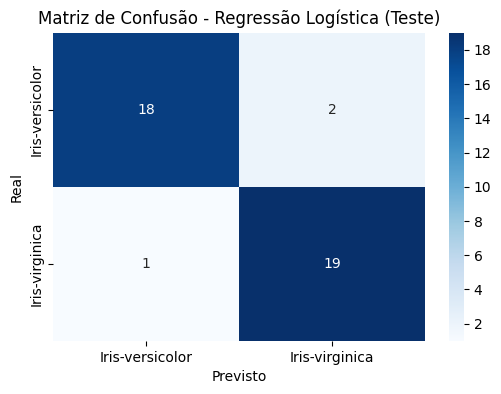

In [ ]:
from google.colab import files
import io
import pandas as pd

# Upload do arquivo
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded[list(uploaded.keys())[0]]))

from sklearn.linear_model import LogisticRegression
#BIBLIOTECA UTILIZADA - one vs rest (um contra todos)
#Ele transforma o problema multiclasse em vários problemas binários.
#Cria um modelo para cada classe, comparando ela contra todas as outras:
#Modelo 1: Setosa vs (Versicolor + Virginica)
#Modelo 2: Versicolor vs (Setosa + Virginica)
#Modelo 3: Virginica vs (Setosa + Versicolor)
#Cada modelo calcula uma probabilidade da amostra pertencer à sua classe.
#No final, o algoritmo escolhe a classe com a maior probabilidade como resposta.
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.utils import shuffle
import seaborn as sns
import matplotlib.pyplot as plt

# ========== CONFIGURAÇÕES ========== #
# Quantidade de exemplares de treino por espécie
train_setosa = 0
train_virginica = 30
train_versicolor = 30

# Quantidade de exemplares de teste por espécie
test_setosa = 0
test_virginica = 20
test_versicolor = 20

# ========== EMBARALHAR E SEPARAR ========== #

df = shuffle(df, random_state=42).reset_index(drop=True)

# Filtrar por espécie
setosa = df[df['Species'] == 'Iris-setosa']
versicolor = df[df['Species'] == 'Iris-versicolor']
virginica = df[df['Species'] == 'Iris-virginica']

# Separar treino
setosa_train = setosa.iloc[:train_setosa]
versicolor_train = versicolor.iloc[:train_versicolor]
virginica_train = virginica.iloc[:train_virginica]

# Separar teste (sem sobreposição com treino)
setosa_test = setosa.iloc[train_setosa:train_setosa+test_setosa]
versicolor_test = versicolor.iloc[train_versicolor:train_versicolor+test_versicolor]
virginica_test = virginica.iloc[train_virginica:train_virginica+test_virginica]

# Combinar dados
train_df = pd.concat([setosa_train, versicolor_train, virginica_train])
test_df = pd.concat([setosa_test, versicolor_test, virginica_test])

# Separar features e labels - 1 - SEPAROU ENTRE AS FEATURES PRESENTES NO DATASET
X_train = train_df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y_train = train_df['Species']
X_test = test_df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y_test = test_df['Species']

# ========== TREINAMENTO ========== #
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# ========== AVALIAÇÃO ========== #

# Previsões
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

# Intercepto e coeficientes
print("Intercepto (bias):")
print(model.intercept_)

print("\nCoeficientes para cada feature:")
for feature, coef in zip(X_train.columns, model.coef_[0]):
    print(f"{feature}: {coef:.4f}")

# Acurácia
print("\nAcurácia (treino):", accuracy_score(y_train, y_pred_train))
print("Acurácia (teste):", accuracy_score(y_test, y_pred_test))

# Relatórios
print("\nMatriz de Confusão (teste):")
print(confusion_matrix(y_test, y_pred_test))

print("\nRelatório de Classificação (teste):")
print(classification_report(y_test, y_pred_test))

# ========== PLOTANDO MATRIZ DE CONFUSÃO (TESTE) ========== #
#A matriz de confusão é uma tabela usada para avaliar o desempenho de um modelo de classificação.#
#Ela compara os valores reais (verdadeiros) com os valores previstos (pelo modelo), mostrando onde o modelo acertou e onde errou.#
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Matriz de Confusão - Regressão Logística (Teste)")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()


In [ ]:
print("Quantidade de inserções (linhas) no dataset:", df.shape[0])


Quantidade de inserções (linhas) no dataset: 150


⚙️ Qual é a fórmula por trás da Regressão Logística?
Apesar do nome, regressão logística é usada para classificação — geralmente binária, mas também funciona com múltiplas classes (como no seu dataset Iris).

📐 Fórmula Matemática
A regressão logística usa uma função chamada sigmoide (ou logística), que transforma qualquer número real em um valor entre 0 e 1 (como uma probabilidade).

1. Função de decisão linear:
Primeiro, calcula-se uma combinação linear das variáveis de entrada (como na regressão linear):

𝑧
=
𝛽
0
+
𝛽
1
𝑥
1
+
𝛽
2
𝑥
2
+
⋯
+
𝛽
𝑛
𝑥
𝑛
z=β
0
​
 +β
1
​
 x
1
​
 +β
2
​
 x
2
​
 +⋯+β
n
​
 x
n
​

ou de forma vetorial:

𝑧
=
𝑤
𝑇
𝑥
+
𝑏
z=w
T
 x+b
𝑤
w = vetor de pesos (coeficientes)

𝑥
x = vetor de variáveis de entrada

𝑏
b = intercepto (ou
𝛽
0
β
0
​
 )

2. Função sigmoide:
Depois, aplica-se a função logística (sigmoide) ao valor
𝑧
z:

𝜎
(
𝑧
)
=
1
1
+
𝑒
−
𝑧
σ(z)=
1+e
−z

1
​

Essa função transforma o valor
𝑧
z em uma probabilidade
𝑝
p entre 0 e 1, que representa a chance da amostra pertencer à classe positiva.

3. Classificação:
Se
𝜎
(
𝑧
)
≥
0.5
σ(z)≥0.5: classifica como classe 1

Senão: classe 0

Para multiclasse (como no Iris), o modelo usa uma técnica chamada One-vs-Rest ou softmax (dependendo da implementação).

📚 Exemplo simplificado:
Vamos supor duas variáveis de entrada: comprimento e largura da pétala.

𝑧
=
−
2
+
0.8
⋅
(
PetalLength
)
+
1.2
⋅
(
PetalWidth
)
z=−2+0.8⋅(PetalLength)+1.2⋅(PetalWidth)
𝑝
=
1
1
+
𝑒
−
𝑧
p=
1+e
−z

1
​

Se
𝑝
>
0.5
p>0.5, o modelo prevê uma determinada espécie.

🎯 Por trás do LogisticRegression do scikit-learn:
Ajusta os coeficientes
𝛽
β usando otimização por máxima verossimilhança, e não mínimos quadrados como na regressão linear.

Pode usar diferentes métodos de regularização (como L2, que penaliza grandes coeficientes).

Permite classificação multiclasse de forma automática.

Parte 2: Visualizando a Função Sigmoide
Agora vamos desenhar a famosa curva sigmoide, pra entender como a função transforma qualquer número real em uma probabilidade:

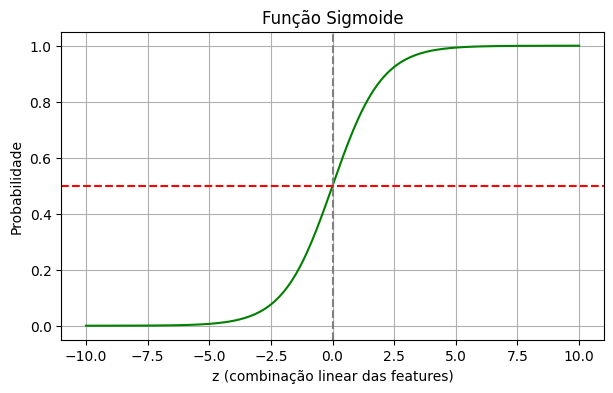

In [ ]:
import numpy as np

# Gera uma faixa de valores z de -10 a 10
z = np.linspace(-10, 10, 200)
# Função sigmoide
sigmoid = 1 / (1 + np.exp(-z))

# Plotando a função sigmoide
plt.figure(figsize=(7,4))
plt.plot(z, sigmoid, color="green")
plt.title("Função Sigmoide")
plt.xlabel("z (combinação linear das features)")
plt.ylabel("Probabilidade")
plt.grid(True)
plt.axvline(0, color='gray', linestyle='--')  # linha vertical no z=0
plt.axhline(0.5, color='red', linestyle='--')  # linha de decisão
plt.show()

 Interpretação da curva:
Para valores de
𝑧
z muito negativos, a saída é próxima de 0.

Para valores de
𝑧
z muito positivos, a saída é próxima de 1.

Em
𝑧
=
0
z=0, a probabilidade é exatamente 0.5 (limiar da decisão).

✅ Objetivo:
Usar a fórmula da regressão logística manualmente para prever a probabilidade de uma flor pertencer a uma das classes com base em suas medidas.

⚙️ Etapas:
Pegamos um exemplo real do dataset Iris (uma linha).

Usamos os coeficientes e interceptos aprendidos pelo modelo.

Calculamos o valor de
𝑧
=
𝑤
1
𝑥
1
+
𝑤
2
𝑥
2
+
.
.
.
+
𝑏
z=w
1
​
 x
1
​
 +w
2
​
 x
2
​
 +...+b

Aplicamos a função sigmoide:

𝜎
(
𝑧
)
=
1
1
+
𝑒
−
𝑧
σ(z)=
1+e
−z

1
​

Comparamos o resultado com o predict_proba() do modelo, só pra garantir 😄

In [ ]:
import numpy as np

# Pegando o primeiro exemplo do dataset de teste
exemplo = X_test.iloc[0]
print("Exemplo escolhido:")
print(exemplo)

# Pegando os coeficientes e interceptos do modelo (3 classes: Setosa, Versicolor, Virginica)
coeficientes = model.coef_     # shape (3, 4)
interceptos = model.intercept_ # shape (3,)

# Calculando z e sigmoid manualmente para cada classe
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

print("\nProbabilidades calculadas manualmente:")
for i, classe in enumerate(model.classes_):
    z = np.dot(coeficientes[i], exemplo) + interceptos[i]
    prob = sigmoid(z)
    print(f"{classe}: {prob:.4f}")

# Comparando com o método do modelo
print("\nProbabilidades com predict_proba:")
probs = model.predict_proba([exemplo])
for classe, prob in zip(model.classes_, probs[0]):
    print(f"{classe}: {prob:.4f}")


Exemplo escolhido:
SepalLengthCm    6.1
SepalWidthCm     2.8
PetalLengthCm    4.7
PetalWidthCm     1.2
Name: 73, dtype: float64

Probabilidades calculadas manualmente:
Iris-setosa: 0.0446
Iris-versicolor: 0.9109
Iris-virginica: 0.6767

Probabilidades com predict_proba:
Iris-setosa: 0.0038
Iris-versicolor: 0.8270
Iris-virginica: 0.1692


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
